<a href="https://colab.research.google.com/github/igorgcgv/igorgcgv/blob/main/Projeto_Analise_de_Dados_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando os Pacotes

!pip install -q -U watermark
!pip install -q missingno
!pip install -q category_encoders
!pip install -q plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.5 MB/s eta 0:00:00


In [ ]:
# Importando as Bibliotecas

#Manipulação de Dados

import pandas as pd
import numpy as np

#Criação de Visualizações

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Análise estatistica

import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

#Engenharia de Atributos

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as category_encoders

#Ignoradores de Avisos

import sys
import warnings
if not sys.warnoptions:
  warnings.simplefilter("ignore")


In [ ]:
#Versões dos pacotes usados aqui!

%reload_ext watermark
%watermark -a 'Igor Cavalcante' --iversions

Author: Igor Cavalcante

matplotlib       : 3.2.2
pandas           : 1.3.5
numpy            : 1.22.4
sys              : 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
missingno        : 0.5.1
scipy            : 1.7.3
category_encoders: 2.6.0
seaborn          : 0.11.2
plotly           : 5.5.0



###Carregando os Dados


In [ ]:
# Fazendo a carga dos dados

arquivo = '/content/aug_train.csv'
dados = pd.read_csv (arquivo , sep = ',')

In [ ]:
#Dando uma olhada no dataframe

dados.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#Verificando o numero de linhas e colunas

dados.shape

(19158, 14)

In [ ]:
#Verificando o nome das colunas

dados.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
#Verificando os tipos de dados  das colunas do dataframe

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

###Análise Exploratória de Dados


In [ ]:
#Descrevendo os dados do tipo "Object", passando como parametro o include , para não considerar os de outro tipo

dados.describe( include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [ ]:
#Descrevendo os dados do tipo "numerico", desconsiderando as variaveis ID e Alvo.
dados.describe().drop (columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


### Na variavel **city_development_index** (Indice de Deselvolvimento da Cidade), os valores médios são **0.83**, mediana **0.90** e desvio padrão **0.12**. Isso significa que a maioria dos canditos são de cidade  bem desenvolvidas.


###  Em **training_hours** (horas gastas para a conclusão do curso), o tempo médio e de **65 horas**, porém possuí como tempo máximo de **336 horas**. Pode ser uma inconsistencia nos dados, assim como também o valor mínimo é de somente **1 hora**, algo que foge da realidade.

###Visualizando as variaveis **Categoricas**

In [ ]:
#Verificando os tipos de dados  das colunas do dataframe

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

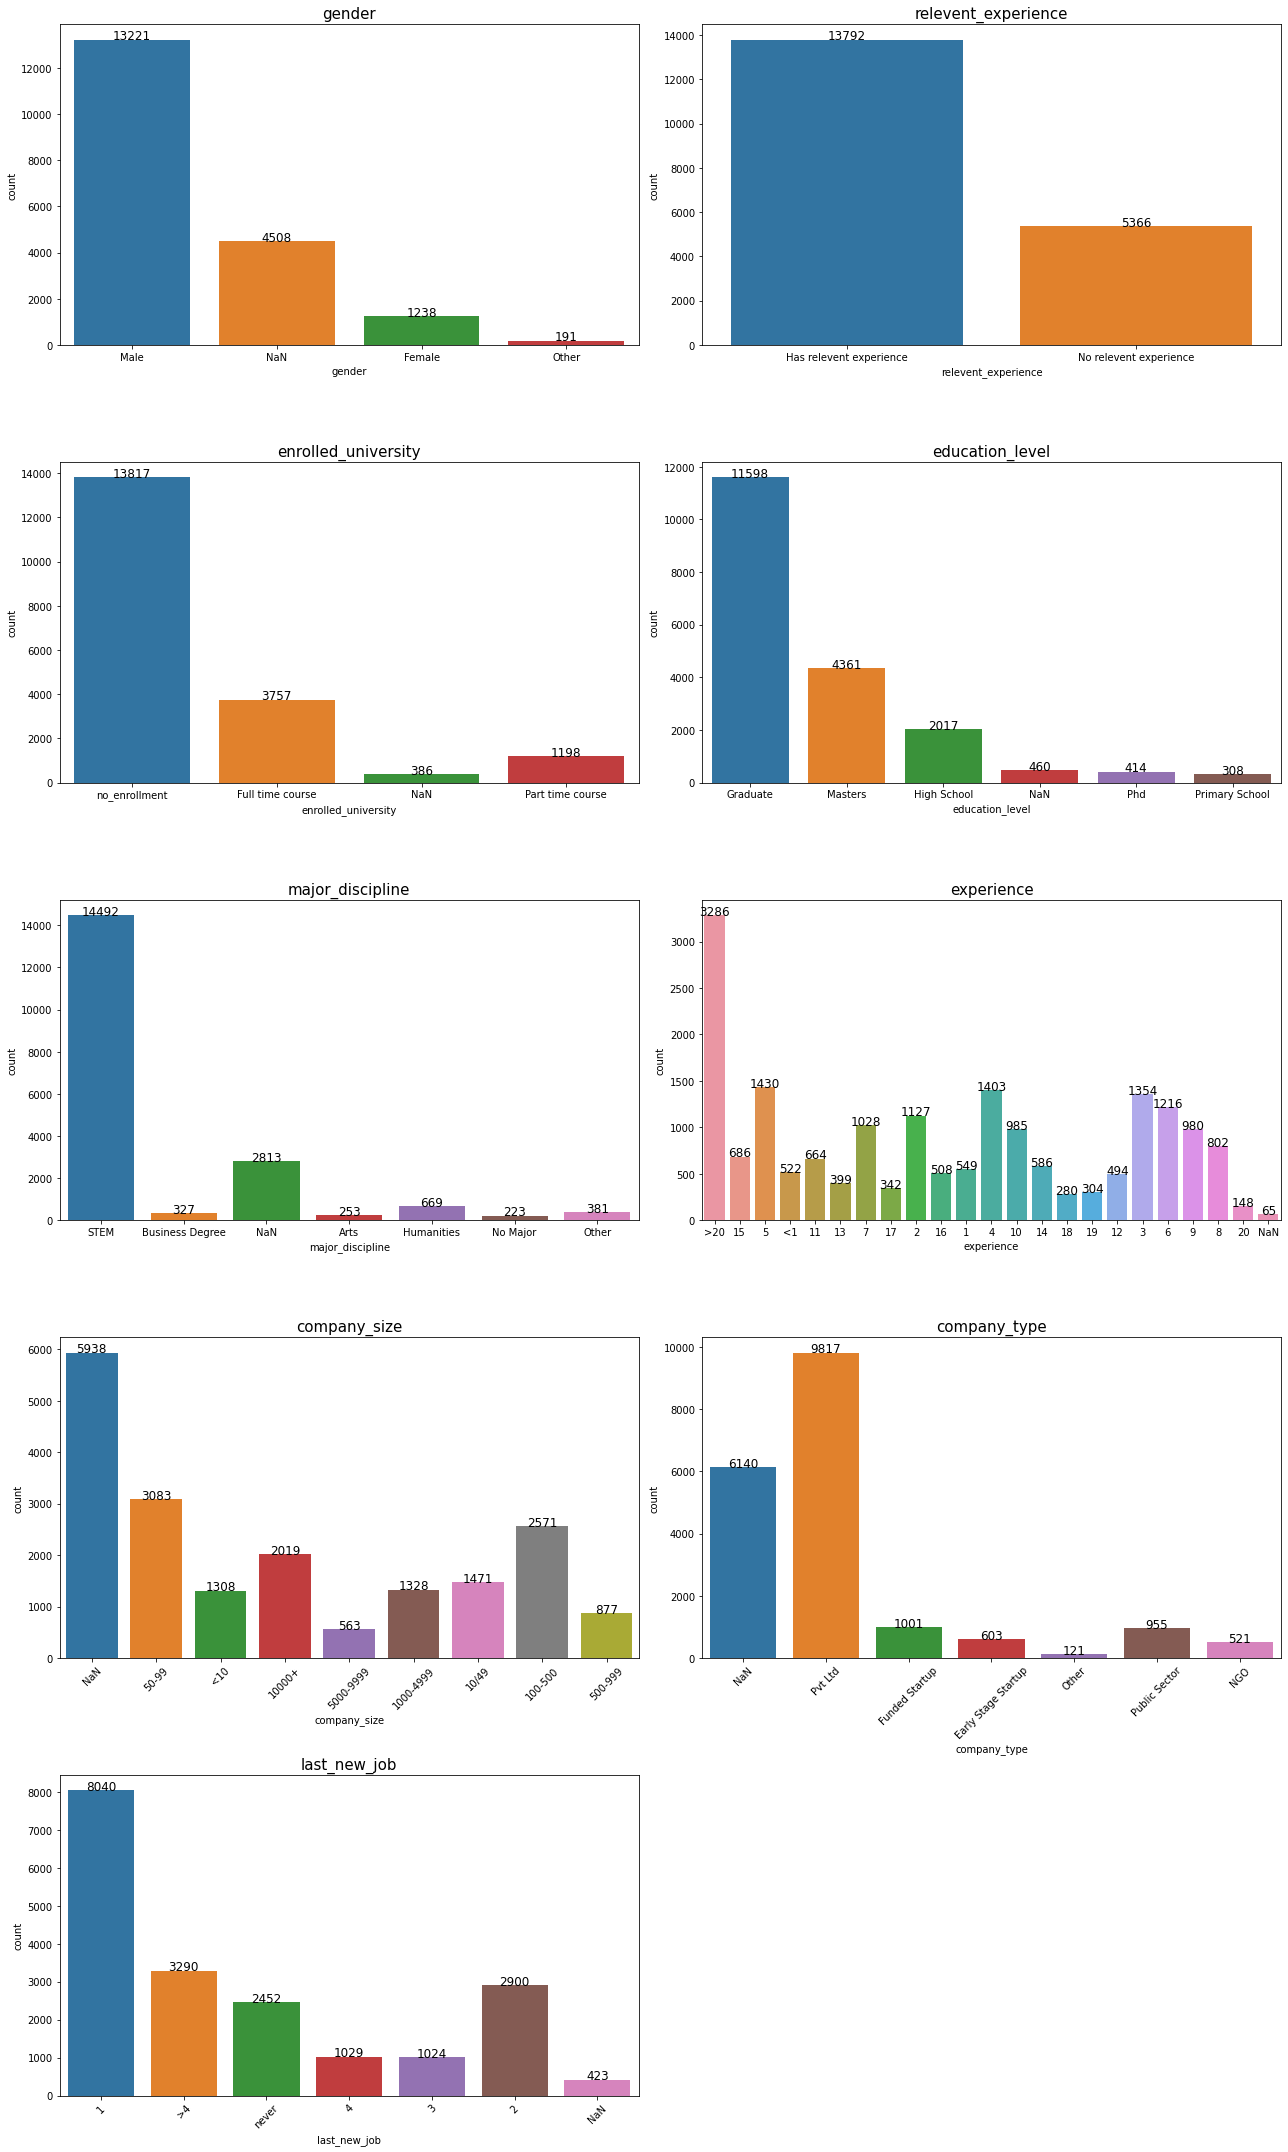

In [ ]:
#Lista de colunas
lista_colunas = list(dados.columns.values)[3:12]

#Plotando os Graficos

#Tamanho da Figura (Area de plotagem)

plt.figure(figsize = (18,30))

#Contador

A = 0

#Loop

for item in lista_colunas:
  A = A + 1
  plt.subplot (5, 2, A)
  ax = sns.countplot (data = dados.fillna ('NaN'), x = item)
  plt.title (item, fontsize = 15)
  for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7 :
      plt.xticks(rotation = 45)

#Layout

plt.tight_layout(h_pad = 2)
 

In [ ]:
#Descrevendo os dados do tipo "numerico", desconsiderando as variaveis ID e Alvo.
dados.describe().drop (columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


###Analisando as Variáveis 	*city_development_index* , *training_hours*

Para a variavel **Indice de Desenvolvimento Cidade (CDI)**, podemos ver pela curva de densidade que essa variavel compreende em uma bimodal , por possuir duas (2) curvas de densidades.

Para a variavel **Horas de Treino**, podemos ver pela curva de densidade que essa variavel tem sua distribuição concentrada em sua maioria no lado esquerdo.

Concluimos que nem a variavel CDI, e nem Horas de Treino são distribuições normais. Isso irá impactar na forma que vamos analisar essas variaveis.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot de Horas de Treinamento')

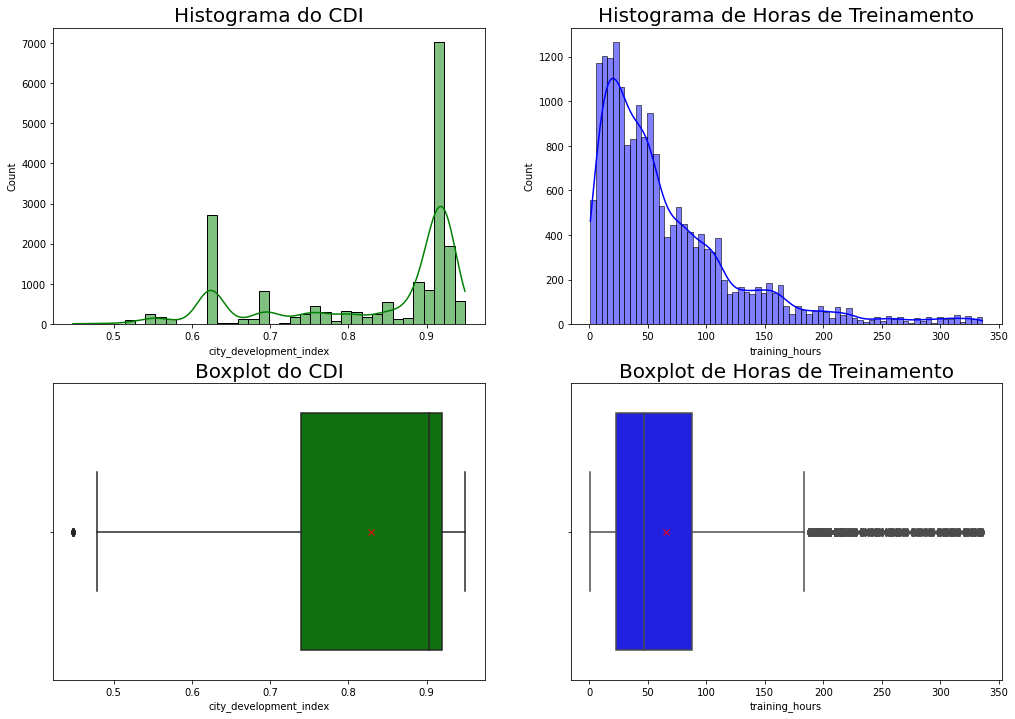

In [ ]:
#Criando os Plots dessas 2 variaveis

#Configurando a Figura


plt.figure (figsize = (17,12))

#Os Plots com o histrograma


#Variavel "city_development_index"


plt.subplot (221) #Escolhendo a região do plot
sns.histplot (dados['city_development_index'], kde = True, color = "green") #Histograma com linha de densidade
plt.title ('Histograma do CDI', fontsize = 20) #Escolhendo o titulo


#Variavel "training_hours"

plt.subplot (222) #Escolhendo a região do plot
sns.histplot (dados['training_hours'], kde = True, color = "blue") #Histograma com curva de densidade
plt.title ('Histograma de Horas de Treinamento', fontsize = 20) #Escolhendo o titulo


#Os Plots com o boxplot


#Variavel "city_development_index"

plt.subplot (223) #Escolhendo a região do plot
sns.boxplot (dados['city_development_index'], color = "green", showmeans = True, meanprops = {"marker" : "x","markeredgecolor": "Red"}) #Histograma com curva de densidade
plt.title ('Boxplot do CDI', fontsize = 20) #Escolhendo o titulo




#Variavel "training_hours"

plt.subplot (224) #Escolhendo a região do plot
sns.boxplot (dados['training_hours'], color = "blue", showmeans = True, meanprops = {"marker" : "x","markeredgecolor": "Red"}) #Histograma com linha de densidade
plt.title ('Boxplot de Horas de Treinamento', fontsize = 20) #Escolhendo o titulo



###Teste de Normalidade das Distribuições

In [ ]:
#Lista com as variaveis numericas "city_development_index","training_hours" :

lista_numerica = ['city_development_index','training_hours']

#Loop

for item in lista_numerica :
  #Calculando a normalidade das variaveis
  stats, pval = normaltest (dados[item])
  if pval > 0.05:
    print (item, ': Distribuição Normal')
  else :
    print (item, ': Distribuição Não Normal')



city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


###Correlação das Variaveis

In [ ]:
dados.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#Criando uma copia do dataframe

dados_numericos = dados.copy()

In [ ]:
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
#Verificando os registros da coluna "experience" e suas frequências


dados_numericos ['experience'].value_counts()


>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [ ]:
#Convertendo a variavel "experience" para numérica

dados_numericos ['experience'] = np.where (dados_numericos ['experience'] == '<1', 1, dados_numericos ['experience'])
dados_numericos ['experience'] = np.where (dados_numericos ['experience'] == '>20', 20, dados_numericos ['experience'])
dados_numericos ['experience'] = dados_numericos ['experience'].astype(float)

In [ ]:
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(3), int64(2), object(9)
mem

In [ ]:
#Verificando os registros da coluna "last_new_job" e suas frequências


dados_numericos ['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [ ]:
#Convertendo a variavel "last_new_job" para numérica

dados_numericos ['last_new_job'] = np.where (dados_numericos ['last_new_job'] == '>4', 4, dados_numericos ['last_new_job'])
dados_numericos ['last_new_job'] = np.where (dados_numericos ['last_new_job'] == 'never', 0, dados_numericos ['last_new_job'])
dados_numericos ['last_new_job'] = dados_numericos ['last_new_job'].astype(float)

In [ ]:
dados_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

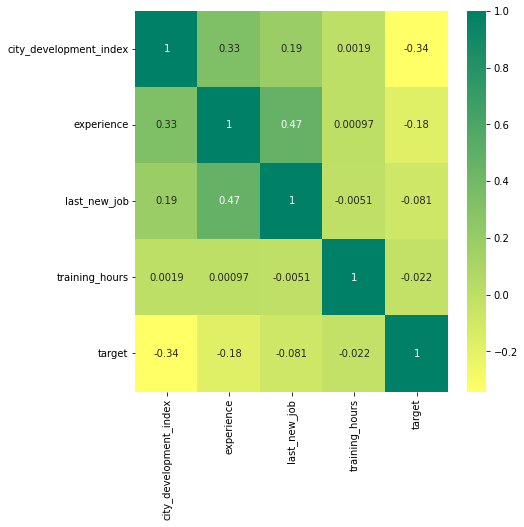

In [ ]:
#Grafico de Calor


plt.figure(figsize = (7,7))
sns.heatmap (dados_numericos.drop(['enrollee_id'], axis = 1).corr(), cmap = 'summer_r', annot = True)

####Pela correlação , a variavel "last_new_job" e "experience" tem uma correlação media (0.47), porém as demais tem correlação não tão relevantes.

As variaveis que estivem proximas de zero com relação a variavel "target" serão descartadas, pois não possui tamanha influência na mesma

###Para a análise categoricas o nível de correlação será realizada utilizando recursos categoricos normais para WOE ( Peso de Evidência) e IV ( Valor da Informação).

Tabelinha com os niveis do IV





< 0.02 , não deve ser usado para previsões;       
0.02 - 0.10 , preditor fraco;     
0.10 - 0.30 , preditor médio;   
0.30 - 0.50 , preditor forte;   
0.50  > - revise, parece ser bom demais pra ser veridíco

In [ ]:
#Fazendo as tabelas para as variaveis e seus respectivos WOE e IV

In [ ]:
for i in dados.drop (columns = ['target',
                              'enrollee_id',
                              'city',
                              'city_development_index',
                              'training_hours',
                              'experience',
                              'last_new_job',
                              'company_size']).columns:

  dados_woe_iv = (pd.crosstab(dados[i], dados['target'], normalize = 'columns')
                  .assign (woe = lambda dfx: np.log (dfx [1] / dfx [0]))
                  .assign (iv = lambda dfx : np.sum (dfx['woe'] * (dfx[1] - dfx[0])))
                                    )
  print (dados_woe_iv, '\n=================================================')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
target                0.0       1.0       woe       iv
education_level                                       
Graduate         0.595579  0.694415  0.153535  0.05117
High School      0.115722  0.084314 -0.316640 

<Figure size 720x1008 with 0 Axes>

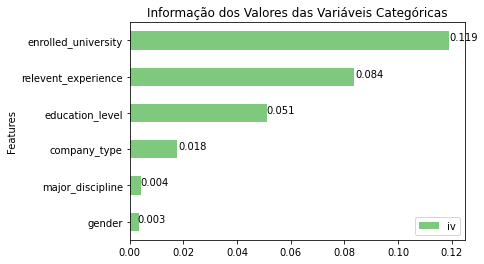

In [ ]:
#Criando um gráfico do IV

#Variaveis categoricas

colunas_categoricas = dados.drop (columns = ['target',
                                            'enrollee_id',
                                            'city',
                                            'city_development_index',
                                            'training_hours',
                                            'experience',
                                            'last_new_job',
                                            'company_size']).columns

#Lista p/ armazenar os IV

iv = []

#loop
for i in colunas_categoricas:
    dados_woe_iv = (pd.crosstab(dados[i], dados['target'], normalize = 'columns')
                  .assign (woe = lambda dfx: np.log (dfx [1] / dfx [0]))
                  .assign (iv = lambda dfx : np.sum (dfx['woe'] * (dfx[1] - dfx[0]))))


    iv.append (dados_woe_iv ['iv'][0])


#Dataframe 

df_iv = pd.DataFrame({'Features':colunas_categoricas,'iv':iv}).set_index('Features').sort_values(by='iv')


#Plotando o graáfico

plt.figure (figsize = (10,14))
df_iv.plot (kind = 'barh', title = 'Informação dos Valores das Variáveis Categóricas', colormap = 'Accent')
for index, value in enumerate(list(round(df_iv ['iv'],3))):
    plt.text((value),index,str(value))
plt.legend(loc = 'lower right')
plt.show()

###Identificando Valores Ausentes

In [ ]:
dados_nulos = dados.isna().sum().reset_index().sort_values(0)


dados_nulos

,index,0
0,enrollee_id,0
1,city,0
2,city_development_index,0
4,relevent_experience,0
12,training_hours,0
13,target,0
8,experience,65
5,enrolled_university,386
11,last_new_job,423
6,education_level,460


In [ ]:
#Verificando se há valores duplicados

dados ['enrollee_id'].duplicated().sum()

0

###Limpeza e Processamento de Dados :   
Tratando os Valores Ausentes


In [ ]:
#Verificando as colunas do dataframe

dados.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
#Definindo o novo dataframe, retirando as variaveis que não influenciam de maneira significativa na variavel target (alvo)

dados_novo = dados[dados.drop (columns = ['enrollee_id',
                                    'city',
                                    'gender',
                                    'company_size',
                                    'last_new_job',
                                    'training_hours']).columns]
dados_novo.head()                                       

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


In [ ]:
#Identificando valores ausentes do novo dataframe

dados_novo_nulos = dados_novo.isna().sum().reset_index().sort_values(0)


dados_novo_nulos

,index,0
0,city_development_index,0
1,relevent_experience,0
7,target,0
5,experience,65
2,enrolled_university,386
3,education_level,460
4,major_discipline,2813
6,company_type,6140


###Tratamento de Valores NaN 'major_discipline'

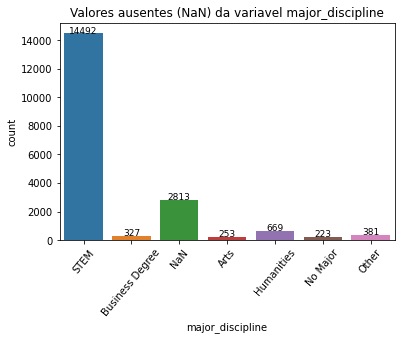

In [ ]:
#Tratando os valores ausentes da variavel 'major_discipline'

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'major_discipline')
plt.title ( 'Valores ausentes (NaN) da variavel major_discipline')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [ ]:



print('\nTotal de Valores Ausentes na Variavel major_discipline:' ,dados_novo ['major_discipline'].isna().sum())

print('\nProporção de valores ausentes na variavel education_level :')

#Associação da variavel 'major_discipline' com a 'education_level'

dados_novo[dados_novo ['major_discipline'].isna()] ['education_level'].value_counts (dropna = False) 






Total de Valores Ausentes na Variavel major_discipline: 2813

Proporção de valores ausentes na variavel education_level :


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Onde há NaN nas variaveis Hight School e Primaty School, iremos preencher com Non Degree (Sem grafuação), visto que uma pessoa com esse nível de escolaridade não poderia ter alguma graduação

In [ ]:
#Criando o index

nan_index = (
    dados_novo[(dados_novo ['major_discipline'].isna())  
    &   
    ((dados_novo ['education_level'] == 'High School')   
      |  (dados_novo ['education_level'] == 'Primary School') 
      |  (dados_novo ['education_level'] .isna()))
  ]
).index


In [ ]:
len(nan_index)
#nan_index

2785

In [ ]:
dados_novo['major_discipline'][nan_index] = 'Non Degree'

<ipython-input-38-fceb2a6bedb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['major_discipline'][nan_index] = 'Non Degree'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


In [ ]:
print('\nTotal de Valores Ausentes na Variavel major_discipline:' ,dados_novo ['major_discipline'].isna().sum())



dados_novo ['major_discipline'].value_counts (dropna = False) 


Total de Valores Ausentes na Variavel major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

In [100]:
#Substituindo os valores que restaram 'NaN' por 'Other'
#Criando o index p/ NaN
nan_index = (
    dados_novo[(dados_novo ['major_discipline'] .isna())].index
    )


In [101]:
len(nan_index)

28

In [102]:
#Substituindo os valores 'NaN' por 'Other'
dados_novo['major_discipline'][nan_index] = 'Other'

<ipython-input-102-5e091c9134ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['major_discipline'][nan_index] = 'Other'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


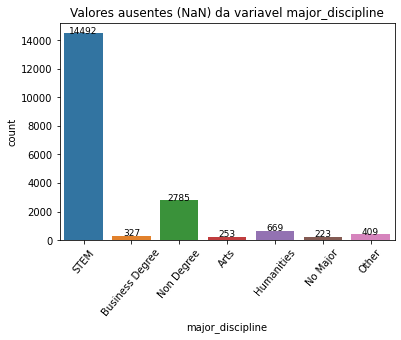

In [103]:
#Visualização da variavel 'major_discipline' após o tratamento de valores NaN


sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'major_discipline')
plt.title ( 'Valores ausentes (NaN) da variavel major_discipline')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [ ]:
dados_novo.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


###Tratamento de Valores NaN 'enrolled_university'



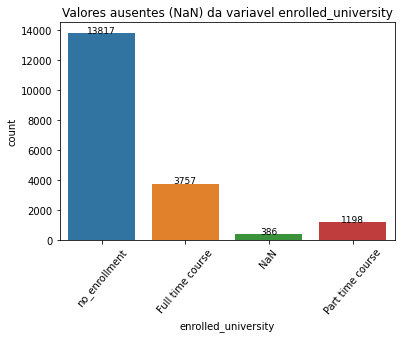

In [ ]:
#Tratando os valores ausentes da variavel 'enrolled_university'

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'enrolled_university')
plt.title ( 'Valores ausentes (NaN) da variavel enrolled_university')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [ ]:

print('\nTotal de Valores Ausentes na Variavel enrolled_university:' ,dados_novo ['enrolled_university'].isna().sum())

print('\nProporção de valores ausentes na variavel education_level :')

#Associação da variavel 'major_discipline' com a 'education_level'

dados_novo[dados_novo ['enrolled_university'].isna()] ['education_level'].value_counts (dropna = False) 


Total de Valores Ausentes na Variavel enrolled_university: 386

Proporção de valores ausentes na variavel education_level :


Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [ ]:
#Criando o index
nan_index = (
    dados_novo[(dados_novo ['enrolled_university'].isna())
    &
    (dados_novo ['education_level'] == 'Primary School')].index
    )



In [66]:
len (nan_index)

0

In [ ]:
#Para pessoas que só possuem 'Primary School', subentende-se que a mesma não pode ingressar em uma faculdade
dados_novo['enrolled_university'][nan_index] = 'no_enrollment'

<ipython-input-51-632e8785cac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['enrolled_university'][nan_index] = 'Not Enrolled'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


In [ ]:

print('\nTotal de Valores Ausentes na Variavel enrolled_university:' ,dados_novo ['enrolled_university'].isna().sum())

print('\nProporção de valores ausentes na variavel education_level :')

#Associação da variavel 'major_discipline' com a 'education_level'

dados_novo[dados_novo ['enrolled_university'].isna()] ['education_level'].value_counts (dropna = False) 


Total de Valores Ausentes na Variavel enrolled_university: 377

Proporção de valores ausentes na variavel education_level :


Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

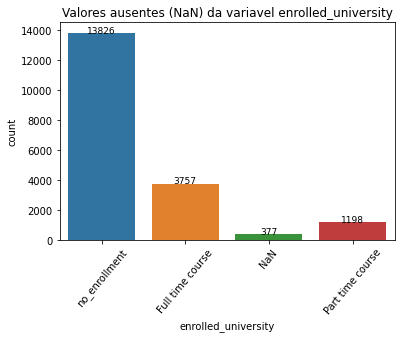

In [77]:
#Plot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'enrolled_university')
plt.title ( 'Valores ausentes (NaN) da variavel enrolled_university')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [81]:
#Criando o index p/ NaN
nan_index_nan = (
    dados_novo[(dados_novo ['enrolled_university'] .isna())].index
    )

In [82]:
len(nan_index_nan)

377

In [83]:
#Substituindo os valores 'NaN' por 'Other'
dados_novo['enrolled_university'][nan_index_nan] = 'Other'

<ipython-input-83-dfc001864328>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['enrolled_university'][nan_index_nan] = 'Other'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


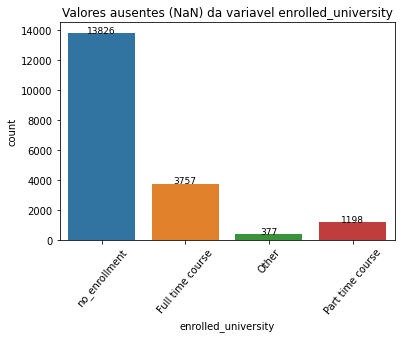

In [84]:
#TPlot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'enrolled_university')
plt.title ( 'Valores ausentes (NaN) da variavel enrolled_university')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

###Tratamento de Valores NaN 'company_type'

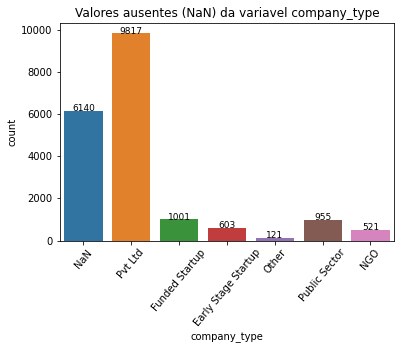

In [86]:
#Plot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'company_type')
plt.title ( 'Valores ausentes (NaN) da variavel company_type')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [87]:
#Criando o index p/ NaN
nan_index = (
    dados_novo[(dados_novo ['company_type'] .isna())].index
    )

In [89]:
len(nan_index)

6140

In [90]:
#Substituindo os valores 'NaN' por 'Other'
dados_novo['company_type'][nan_index] = 'Other'

<ipython-input-90-d9529ce26dd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['company_type'][nan_index] = 'Other'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


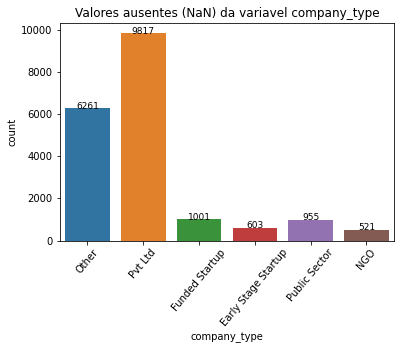

In [91]:
#Plot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'company_type')
plt.title ( 'Valores ausentes (NaN) da variavel company_type')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

###Tratamento de Valores NaN 'education_level'

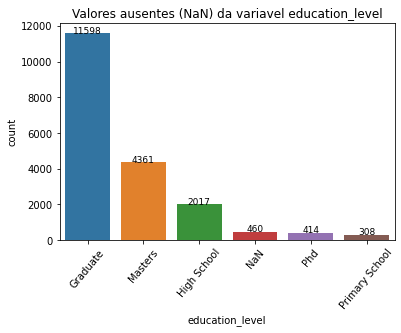

In [92]:
#Plot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'education_level')
plt.title ( 'Valores ausentes (NaN) da variavel education_level')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)

plt.show()

In [93]:
#Criando o index p/ NaN
nan_index = (
    dados_novo[(dados_novo ['education_level'] .isna())].index
    )

In [94]:
len(nan_index)

460

In [95]:
#Substituindo os valores 'NaN' por 'Other'
dados_novo['education_level'][nan_index] = 'Other'

<ipython-input-95-03f92c50ea7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_novo['education_level'][nan_index] = 'Other'
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)


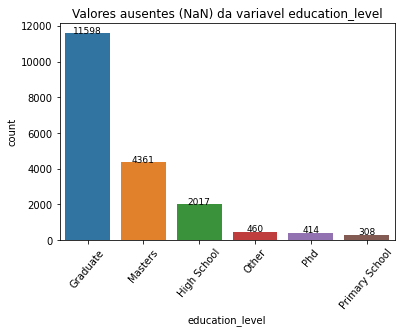

In [96]:
#Plot

sns.countplot ( data = dados_novo.fillna ('NaN'), x = 'education_level')
plt.title ( 'Valores ausentes (NaN) da variavel education_level')
plt.xticks ( rotation = 50)
#bound = ax.get_xbound ()

ax = plt.gca ()
for p in ax.patches:
    ax.annotate (f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 9)


###Tratamento de Valores NaN 'experience'

In [106]:
#Verificando o percentual de valores ausentes em nosso dataframe

percentual_nan = dados_novo.isnull().sum() / len (dados_novo) * 100
percentual_nan

#Com isso temos que há 0,33% de registros com valores 'NaN', com isso iremos aplicar a tecnica de simplesmente deletar esses registros, por motivo de serem de proporções não tão relevantes

city_development_index    0.000000
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.339284
company_type              0.000000
target                    0.000000
dtype: float64

In [107]:
dados_novo = dados_novo.dropna()

In [109]:
#Resultado
percentual_nan = dados_novo.isnull().sum() / len (dados_novo) * 100
percentual_nan

city_development_index    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_type              0.0
target                    0.0
dtype: float64

In [110]:
#Visualizando o novo dataframe após todas as mudanças que foram realizadas

dados_novo.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Other,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


###Fim!